# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

## Team Members
- Luis Miguel Álvarez Caloca - A01732666
- Juan Ricardo Albarracin Barbosa - A01794818

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


In [2]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os
from sklearn.model_selection import train_test_split # Team's choice for data splitting

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


#### We decided importing train_test_split from Scikit-learn, a widely used library in machine learning.
#### This function is reliable, well-tested, and considered a standard for dataset splitting.
#### It simplifies the process of creating reproducible and well-balanced splits.


In [3]:
# to load the data using google colaboratory
# DATA_PATH = '/media/pepe/DataUbuntu/Databases/asl_data/'
#DATA_PATH = '/home/pepe/Documents/github_repos/datasets/asl_data'
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/My Drive/MAESTRÍA/TRIMESTRE 3/DEEP LEARNING/HW1/asl_data'

train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

ModuleNotFoundError: No module named 'google.colab'

In [18]:
# to load the data in a local environment
DATA_PATH = '../data/asl_data'
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [19]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Importar Images

In [20]:
y_train = np.array(train_df['label'])
y_val = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

In [38]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((27455, 784), (27455,), (3586, 784), (3586,))

In [21]:
def split_val_test(x: np.ndarray, y: np.ndarray, pct: float = 0.5, shuffle: bool = True) -> tuple:
    '''
    Split the previously loaded validation set into valition and test.

    Args:
      x (np.ndarray): The features of the dataset (input data, images or tabular data).
      y (np.ndarray): The labels corresponding to the features (target values).
      pct (float): The proportion of the dataset to allocate to the test set (default is 0.5 or 50%).
      shuffle (bool): Whether to shuffle the dataset before splitting (default is True).
        Setting shuffle = True ensures that the data is randomly mixed before splitting.
        This prevents potential biases caused by ordered datasets (e.g., samples grouped by class).
        It helps create representative validation and test sets, improving model evaluation and generalization.
        Shuffle is a standard practice in most machine learning workflows unless the data is sequential (e.g., time series).
    
    Returns:
      tuple: The split datasets in the following order: x_val, y_val, x_test, y_test
    '''
    x_val, x_test, y_val, y_test = train_test_split(
        x, y, test_size=pct, shuffle=shuffle, random_state=42 # random_state=42 Ensures reproducibility by setting a fixed random seed for shuffling.
    )
    return x_val, y_val, x_test, y_test


In [22]:
#NOTE: version proposed by juan (more manual)
def split_val_test(x, y, pct=0.5, shuffle=True):
    '''
    Split the previously loaded validation set into valition and test.

    Args:
      x (np.ndarray): The features of the dataset (input data, images or tabular data).
      y (np.ndarray): The labels corresponding to the features (target values).
      pct (float): The proportion of the dataset to allocate to the test set (default is 0.5 or 50%).
      shuffle (bool): Whether to shuffle the dataset before splitting (default is True).
        Setting shuffle = True ensures that the data is randomly mixed before splitting.
        This prevents potential biases caused by ordered datasets (e.g., samples grouped by class).
        It helps create representative validation and test sets, improving model evaluation and generalization.
        Shuffle is a standard practice in most machine learning workflows unless the data is sequential (e.g., time series).
    
    Returns:
      tuple: The split datasets in the following order: x_val, y_val, x_test, y_test
    '''
    if shuffle:
        idx = np.random.permutation(len(y))
        x = x[idx]
        y = y[idx]
    split = int(len(y) * pct)
    return x[:split], y[:split], x[split:], y[split:]

In [23]:
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

In [24]:
### The following code is to remove the letters 'j' and 'z' from the alphabet
alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))

24


### Normalise

In [25]:
def normalise(x_mean: float, x_std: float, x_data: np.ndarray) -> np.ndarray:
    '''
    Normalise the input data based on the mean and standard deviation.

    Args:
        x_mean (float): Mean of the input data.
        x_std (float): Standard deviation of the input data.
        x_data (np.ndarray): Input data.

    Returns:
        np.ndarray: Normalised input data.
    '''
    return (x_data - x_mean) / x_std

x_mean = x_train.mean() # We calculate the mean of the training set
x_std = x_train.std() # We calculate the standard deviation of the training set

   # - We only use the training set to compute these statistics to avoid data leakage.
   # - The validation and test sets must not influence the model during training.


x_train = normalise(x_mean, x_std, x_train) # Normalizing the training set
x_val = normalise(x_mean, x_std, x_val) # Normalizing the validation set using training stats
x_test = normalise(x_mean, x_std, x_test) # Normalise the test set using training stats

x_train.mean(), x_train.std()

(3.6268384e-06, 0.99999946)

#### Mean expected value of ~0 and standard deviation of ~1
#### Which in this case is correct, normalization was applied correctly.

### Graficar muestras

Next, we will plot a random sample of images from the dataset to visualize the data. 

This step helps us understand the structure of the data and verify that the images are loaded correctly.

We use two functions to plot the images. The first one plots a single image, while the second one plots a random sample of images.

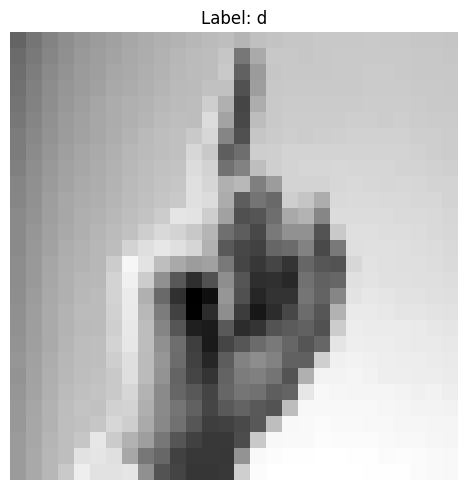

In [104]:
def plot_image(image: np.array, label: int):
    """
    Plot a single image from the dataset.

    Args:
        image (numpy.ndarray): Image to plot.
        label (int): Label of the image.

    Returns:
        None
    """
    # Create the figure using matplotlib
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    # Reshape the image to 28x28
    image = image.reshape(28, 28)

    # Show the image and set the title
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {alphabet[label]}")
    ax.axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

plot_image(x_train[0], y_train[0])

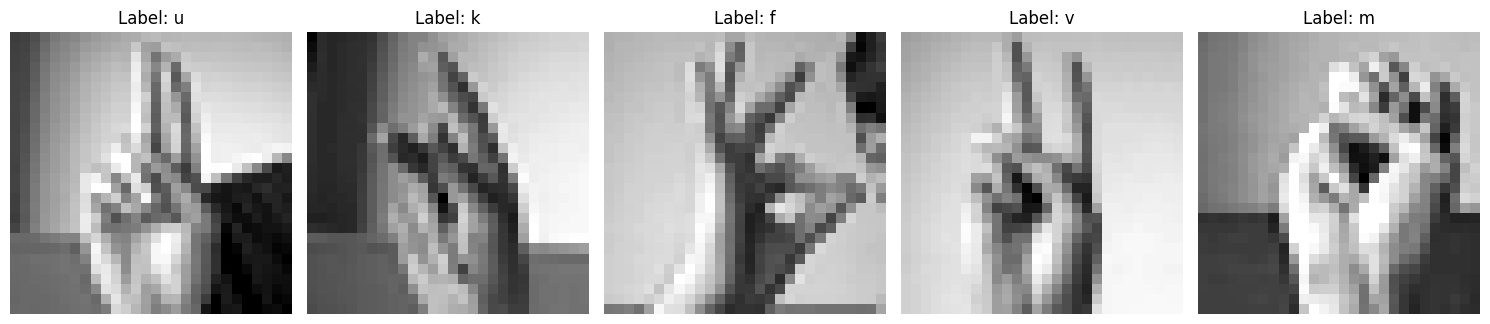

In [105]:

def plot_samples(x_data: np.array, y_data: np.array, num_samples: int = 5):
    """
    Plot a random sample of images from the dataset.

    Args:
        x_data (numpy.ndarray): Images set to plot.
        y_data (numpy.ndarray): Labels of the images.
        num_samples (int): Number of samples to plot.

    Returns:
        None
    """
    # Select random indices to plot
    indices = np.random.choice(range(len(x_data)), num_samples, replace=False)
    selected_images = x_data[indices]
    selected_labels = y_data[indices]

    # Create the figure using matplotlib
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i, ax in enumerate(axes):
        # Reshape the image to 28x28
        image = selected_images[i].reshape(28, 28)
        label = selected_labels[i]

        # Show the image and set the title
        ax.imshow(image, cmap='gray')
        ax.set_title(f"Label: {alphabet[label]}")
        ax.axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

plot_samples(x_train, y_train, num_samples=5)

### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Funciones adicionales

#### Mini batches

Minibatches function is important for training the model because it allows to split the data into smaller chunks to be trained in parallel.
It allows to train the model faster and more efficiently.

In [27]:

def create_minibatches(mb_size: int, x: np.ndarray, y: np.ndarray, shuffle: bool = True):
    '''
    Function to create minibatches of the data for more efficient training.
    This function is used to create subsets of the data to be used during training.
    Args:
        mb_size (int): Size of the minibatches.
        x (np.ndarray): Input data.
        y (np.ndarray): Labels.
        shuffle (bool): Whether to shuffle the data before creating minibatches.
    Returns:
        generator: A generator that yields minibatches of the data.
    '''
    # Ensure the number of samples in x and y are the same
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    total_data = x.shape[0] # Get the total number of data samples
    if shuffle: # Shuffle the data if shuffle is True
        idxs = np.arange(total_data) # Create an array of indices and shuffle them
        np.random.shuffle(idxs)
        # Reorder x and y according to the shuffled indices
        x = x[idxs]
        y = y[idxs]  
    # Generate minibatches
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

## Nuestra clase Linear, ReLU y Sequential

This class is used to create a tensor class. It helps to keep track of the gradients and the operations that are performed on the tensor.

In [28]:
class np_tensor(np.ndarray): pass # subclassing np.ndarray to create a tensor class

###  Clase Linear

Linear class is a layer that performs a linear transformation of the input data using weights and biases 
and computes the forward and backward passes of the layer

In [29]:
class Linear():
    def __init__(self, input_size: int, output_size: int):
        """
        Function to initialise the parameters of the linear layer using Kaiming He.

        Args:
            input_size (int): Number of pixels in the input data.
            output_size (int): Number of neurons in the layer.
        """
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor) # init weights
        self.b = (np.zeros((output_size, 1))).view(np_tensor) # init biases

    def __call__(self, X: np_tensor) -> np_tensor:
        """
        Function to compute the forward pass of the linear layer.

        Args:
            X (np_tensor): Input data.

        Returns:
            np_tensor: Z: Output of the linear layer.
        """
        Z = self.W @ X + self.b # forward pass
        return Z
    
    def backward(self, X: np_tensor, Z: np_tensor) -> None:
        """
        Function to compute the backward pass of the linear layer and update the gradients of X, W and b.

        Args:
            X (np_tensor): Input data (output of previus layer).
            Z (np_tensor): Output of the linear layer.
        """
        X.grad = self.W.T @ Z.grad # gradient of the input
        self.W.grad = Z.grad @ X.T # gradient of the weights
        self.b.grad = np.sum(Z.grad, axis=1, keepdims=True) # gradient of the biases  
    

### Clase ReLU

ReLU activation class is a function that applies the ReLU activation function to the input data.
The ReLU activation function is defined as f(x) = max(0, x).
The function returns the output of the ReLU activation function.

In [106]:
class ReLU():
    def __call__(self, Z: np_tensor) -> np_tensor:
        """
        Function to compute the forward pass of the ReLU activation function.

        Args:
            Z (np_tensor): Input data (output of the linear layer).
        
        Returns:
            np_tensor: A: Output of the ReLU activation function.
        """
        return np.maximum(0, Z)
    
    def backward(self, Z: np_tensor, A: np_tensor) -> None:
        """
        Function to compute the backward pass of the ReLU activation function and update the gradients of Z.

        Args:
            Z (np_tensor): Input data (output of the previus linear layer).
            A (np_tensor): Output of the ReLU activation function.
        """
        Z.grad = A.grad.copy()
        Z.grad[Z <= 0] = 0 # values less than 0 have zero gradient

### Clase Sequential

Sequential class to create the neural network with multiple layers. This class has methods to compute the forward, backward and update the parameters of the network.
Also, it has a method to predict the class of the input data.

In [107]:

class Sequential_layers():
    def __init__(self, layers: list[np_tensor]):
        """
        Function to initialise the layers of the neural network.

        Args:
            layers (list[np_tensor]): List containing objects of type Linear, ReLU.
        """
        self.layers = layers
        self.x = None # temporary variable to store the output of the layers
        self.outputs = {} # dictionary to store the activations of the layers 

    def __call__(self, X: np_tensor) -> np_tensor:
        """
        Function to compute the forward pass of the neural network.

        Args:
            X (np_tensor): Input data.

        Returns:
            np_tensor: Output of the neural network.
        """
        self.x = X 
        self.outputs['l0'] = self.x # in the layer l0, the input is the input images X
        for i, layer in enumerate(self.layers, 1): 
            self.x = layer(self.x) # forward pass for each layer
            self.outputs['l'+str(i)]=self.x # store the output of each layer
        return self.x # output of the neural network (output of the last layer)
    
    def backward(self):
        """
        Function to compute the backward pass of the neural network.
        Implement backward pass for each layer.
        """
        for i in reversed(range(len(self.layers))): # iterate over the layers in reverse order
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)]) # compute the backward pass

    def update(self, learning_rate: float = 1e-3):
        """
        Function to update the weights and biases of the layers using gradient descent.

        Args:
            learning_rate (float, optional): Defaults to 1e-3. Size of the step to update the parameters.
        """
        for layer in self.layers: # iterate over the layers
            if isinstance(layer, ReLU): continue # ReLU has no parameters, so we skip it
            layer.W = layer.W - learning_rate * layer.W.grad # update weights
            layer.b = layer.b - learning_rate * layer.b.grad # update biases

    def predict(self, X: np_tensor):
        """
        Function to predict the class of the input data. Output is the class with the highest probability.

        Args:
            X (np_tensor): Input data.

        Returns:
            Predicted class.
        """
        return np.argmax(self.__call__(X)) # return the class with the highest probability           

### Cost Function

Cost function is used to evaluate the performance of the model each iteration. 

It measures the difference between the predicted values and the true values.

Cross-entropy loss is commonly used for classification problems.

It measures the difference between two probability distributions: the predicted and the true distribution.

Cross-entropy loss is used with softmax activation in the output layer.

It is the negative log-likelihood of the true labels given the predicted probabilities.

The goal is to minimize the cross-entropy loss to improve the model's performance.

In [84]:
def softmaxXEntropy(x: np_tensor, y: np.ndarray):
    """
    Function to compute the softmax and cross entropy loss.

    Args:
        x (np_tensor): Input data.
        y (np.ndarray): True labels.

    Returns:
        np.ndarray: Predictions.
        float: Cost.
    """
    batch_size = x.shape[1] 
    exp_scores = np.exp(x) # exponentiate the scores
    probs = exp_scores / exp_scores.sum(axis = 0) 
    preds = probs.copy()
    # Cost function calculation
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size
    # Gradient calculation
    probs[y.squeeze(), np.arange(batch_size)] -= 1 #dl/dx
    x.grad = probs.copy()
    
    return preds, cost

Accuracy function is used to compute the accuracy of the model.

In [108]:
def accuracy(model, x, y, mb_size: int) -> float:
    """
    Function to compute the accuracy of the model.

    Args:
        model: Sequential model.
        x (np.ndarray): Input data.
        y (np.ndarray): True labels.
        mb_size (int): Minibatch size.
    
    Returns:
        float: Accuracy of the model
    """
    correct = 0
    total = 0
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        pred = model(x.T.view(np_tensor))
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
        total += pred.shape[1]
    return correct/total

### Loop de entrenamiento

This function allow us to train the model specifying the number of epochs, minibatch size and learning rate.

In [109]:
def train(model, epochs: int, mb_size: int = 128, learning_rate: float = 1e-3):
    """
    Function to train the neural network. Print the cost and accuracy of the model.

    Args:
        model (Sequential_layers): Neural network model.9
        epochs (int): Number of epochs to train the model.
        mb_size (int, optional): Defaults to 128. Size of the minibatches.
        learning_rate (float, optional): Defaults to 1e-3. Size of the step to update the parameters.
    """

    for epoch in range(epochs):
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)): # loop over minibatches
            scores = model(x.T.view(np_tensor)) 
            _, cost = softmaxXEntropy(scores, y) # cost calculation
            model.backward() 
            model.update(learning_rate)
        print(f'Epoch: {epoch}, costo: {cost}, accuracy: {accuracy(model, x_val, y_val, mb_size)}')

### Create your model and train it

We define the model architecture as follows:
1. Linear layer with 784 input neurons (size of images) and 270 output neurons.
2. ReLU activation function.
3. Linear layer with 270 input neurons and 180 output neurons.
4. ReLU activation function.
5. Linear layer with 180 input neurons and 90 output neurons.
6. ReLU activation function.
7. Linear layer with 90 input neurons and 24 output neurons (quantity of classes).

We use the following hyperparameters:
Minibatch size: 512
Learning rate: 1e-3
Number of epochs: 30

In [87]:
model = Sequential_layers([Linear(784, 270), ReLU(), Linear(270, 180), ReLU(), Linear(180, 90), ReLU(), Linear(90, 24)]) # defining the model architecture
mb_size = 512 # minibatch size
learning_rate = 1e-3 # learning rate
epochs = 30 # number of epochs

In [88]:
train(model, epochs, mb_size, learning_rate) # training the model

Epoch: 0, costo: 0.4882164135020039, accuracy: 0.6553262688232013
Epoch: 1, costo: 0.03307943757528092, accuracy: 0.7671500278862242
Epoch: 2, costo: 0.0063765171077777094, accuracy: 0.7799776910206359
Epoch: 3, costo: 0.003474413853323059, accuracy: 0.7836029001673174
Epoch: 4, costo: 0.0027098582472112366, accuracy: 0.7824874511991077
Epoch: 5, costo: 0.0022903622992035736, accuracy: 0.7844394868934746
Epoch: 6, costo: 0.0017172340328123123, accuracy: 0.7841606246514222
Epoch: 7, costo: 0.0013885408811787749, accuracy: 0.783324037925265
Epoch: 8, costo: 0.0010750659178690514, accuracy: 0.7849972113775795
Epoch: 9, costo: 0.0007672376927560854, accuracy: 0.7863915225878416
Epoch: 10, costo: 0.0007944103627003767, accuracy: 0.7875069715560513
Epoch: 11, costo: 0.0007711081291518612, accuracy: 0.7877858337981037
Epoch: 12, costo: 0.0006131670938862508, accuracy: 0.7883435582822086
Epoch: 13, costo: 0.0004921632525585882, accuracy: 0.7880646960401562
Epoch: 14, costo: 0.00038661002722485

In [110]:
print('Accuracy obtained', accuracy(model, x_test, y_test, mb_size))

Accuracy obtained 0.7975460122699386


### Test your model on Random data from your test set

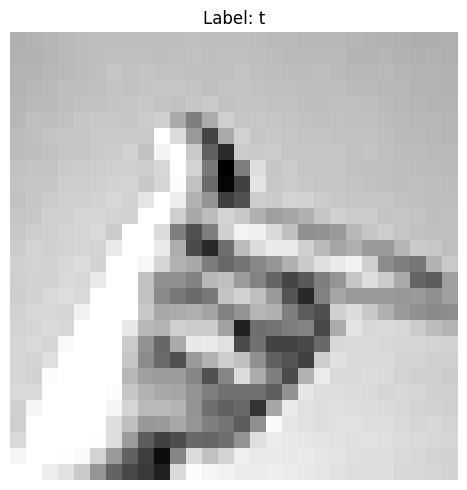

Real value: "t". Predicted value: "t"


In [112]:
idx = np.random.randint(0, len(x_test))
plot_image(x_test[idx], y_test[idx])
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'Real value: "{alphabet[y_test[idx]]}". Predicted value: "{alphabet[pred]}"')